# RNN预测股价

In [1]:
# 依赖导入
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.metrics import r2_score

In [2]:
plt.rcParams['font.sans-serif'] = ['Songti SC']

In [3]:
# 加载数据
raw_train_data = pd.read_csv("./task1_data_train.csv")
raw_train_data.head()
train_data = raw_train_data.loc[:, "close"]
train_data.head()

0    167.5400
1    163.6601
2    159.6147
3    158.6385
4    157.4390
Name: close, dtype: float64

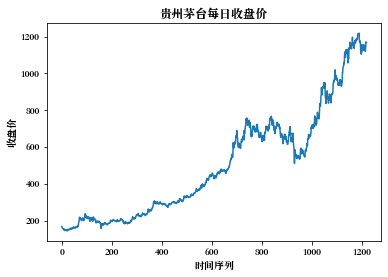

In [4]:
# 数据可视化
fig1 = plt.figure()
plt.plot(train_data)
plt.title("贵州茅台每日收盘价")
plt.xlabel("时间序列")
plt.ylabel("收盘价")
plt.show()

In [5]:
# 数据预处理 归一化
train_data_normal = train_data/max(train_data)
train_data_normal.head()

0    0.137384
1    0.134202
2    0.130885
3    0.130085
4    0.129101
Name: close, dtype: float64

In [6]:
# 数据序列提取方法
def extract_data(data, time_step=10):
    x = []
    y = []
    for i in range(len(data)-time_step):
        x.append([a for a in data[i: i+time_step]])
        y.append(data[i+time_step])
    x = np.array(x)
    x.resize(x.shape[0],x.shape[1], 1)
    y = np.array(y)
    return x,y

In [7]:
# 方法测试
test_data = [i for i in range(1, 10)]
test_step = 5
x,y = extract_data(test_data, test_step)
print(x)
print(y)

[[[1]
  [2]
  [3]
  [4]
  [5]]

 [[2]
  [3]
  [4]
  [5]
  [6]]

 [[3]
  [4]
  [5]
  [6]
  [7]]

 [[4]
  [5]
  [6]
  [7]
  [8]]]
[6 7 8 9]


In [8]:
# 股票价格数据处理
time_step = 10
x, y = extract_data(train_data_normal, time_step)
print(x[:2])
print(y[:2])

[[[0.13738403]
  [0.13420248]
  [0.13088522]
  [0.13008473]
  [0.12910113]
  [0.12646899]
  [0.12541758]
  [0.12426432]
  [0.12622479]
  [0.12625194]]

 [[0.13420248]
  [0.13088522]
  [0.13008473]
  [0.12910113]
  [0.12646899]
  [0.12541758]
  [0.12426432]
  [0.12622479]
  [0.12625194]
  [0.11904087]]]
[0.11904087 0.12080463]


In [9]:
# 确认数据维度
print(x.shape, len(y))

(1209, 10, 1) 1209


In [10]:
# 建立模型
rnn_model = Sequential()
# 添加rnn层
rnn_model.add(SimpleRNN(units=5, input_shape=(10,1), activation="relu"))
rnn_model.add(Dense(units=1, activation="linear"))
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 模型配置
rnn_model.compile(optimizer="adam", loss="mean_squared_error")

In [12]:
# 模型训练
rnn_model.fit(x, y, batch_size=30, epochs=200)

Epoch 1/200
41/41 [==============================] - 1s 2ms/step - loss: 0.2529
Epoch 2/200
41/41 [==============================] - 0s 2ms/step - loss: 0.1918
Epoch 3/200
41/41 [==============================] - 0s 2ms/step - loss: 0.1451
Epoch 4/200
41/41 [==============================] - 0s 1ms/step - loss: 0.1118
Epoch 5/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0623
Epoch 6/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 7/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 8/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 9/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 10/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 11/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 12/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 13/200
41/41 [=================

41/41 [==============================] - 0s 1ms/step - loss: 1.8944e-04
Epoch 99/200
41/41 [==============================] - 0s 1ms/step - loss: 1.8162e-04
Epoch 100/200
41/41 [==============================] - 0s 1ms/step - loss: 1.6796e-04
Epoch 101/200
41/41 [==============================] - 0s 1ms/step - loss: 1.8545e-04
Epoch 102/200
41/41 [==============================] - 0s 1ms/step - loss: 1.8431e-04
Epoch 103/200
41/41 [==============================] - 0s 1ms/step - loss: 1.8264e-04
Epoch 104/200
41/41 [==============================] - 0s 1ms/step - loss: 1.8574e-04
Epoch 105/200
41/41 [==============================] - 0s 1ms/step - loss: 1.9337e-04
Epoch 106/200
41/41 [==============================] - 0s 1ms/step - loss: 1.9550e-04
Epoch 107/200
41/41 [==============================] - 0s 1ms/step - loss: 1.9539e-04
Epoch 108/200
41/41 [==============================] - 0s 1ms/step - loss: 1.8991e-04
Epoch 109/200
41/41 [==============================] - 0s 1ms/step - 

41/41 [==============================] - 0s 1ms/step - loss: 1.7141e-04
Epoch 194/200
41/41 [==============================] - 0s 1ms/step - loss: 1.7585e-04
Epoch 195/200
41/41 [==============================] - 0s 1ms/step - loss: 1.7698e-04
Epoch 196/200
41/41 [==============================] - 0s 1ms/step - loss: 1.8696e-04
Epoch 197/200
41/41 [==============================] - 0s 2ms/step - loss: 1.6754e-04
Epoch 198/200
41/41 [==============================] - 0s 2ms/step - loss: 1.6357e-04
Epoch 199/200
41/41 [==============================] - 0s 1ms/step - loss: 1.7929e-04
Epoch 200/200
41/41 [==============================] - 0s 1ms/step - loss: 1.7841e-04


In [13]:
# 结果预测
y_train_predict = rnn_model.predict(x)
y_train_predict = y_train_predict * max(train_data)
print(y_train_predict)

[[ 154.90364]
 [ 152.05481]
 [ 150.66875]
 ...
 [1134.0139 ]
 [1139.4058 ]
 [1150.0137 ]]


In [14]:
y = y * max(train_data)
y

array([ 145.1705,  147.3214,  150.8621, ..., 1149.5684, 1172.1051,
       1169.3375])

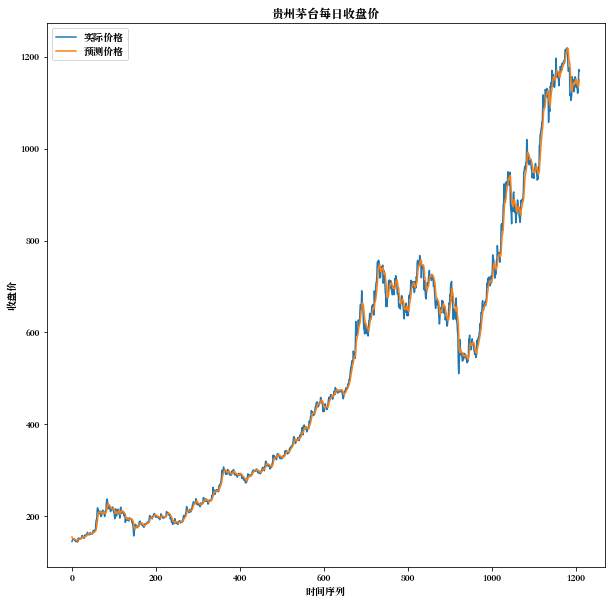

In [15]:
# 数据可视化
fig2 = plt.figure(figsize=(10,10))
plt.plot(y, label="实际价格")
plt.plot(y_train_predict, label="预测价格")
plt.title("贵州茅台每日收盘价")
plt.xlabel("时间序列")
plt.ylabel("收盘价")
plt.legend()
plt.show()

In [16]:
r2_train_score = r2_score(y, y_train_predict)
print(r2_train_score)

0.9973257654878939


In [17]:
#有的小伙伴训练一次以后发现预测出来的结果不理想，很可能是模型进行初始化的时候选取的随机系数不合适，导致梯度下降搜索时遇到了局部极小值
#解决办法：尝试再次建立模型并训练
#多层感知机结构在进行模型求解时，会给定一组随机的初始化权重系数，这种情况是正常的。通常我们可以观察损失函数是否在变小来发现模型求解是否正常

In [18]:
# 测试集数据
raw_test_data = pd.read_csv("./task1_data_test.csv")
print(raw_test_data.head())
test_data = raw_test_data.loc[:, "close"]

# 归一化
test_data_normal = test_data/max(train_data)
print(test_data_normal)
# 测试数据序列的提取
x_test, y_test = extract_data(test_data_normal, time_step)
print(x_test[:2])
print(y_test[:2])

       date       open       high        low      close  volume
0  2020/1/2  1114.9727  1131.8356  1103.1112  1116.9496  148099
1  2020/1/3  1104.0997  1104.0997  1064.4628  1066.1036  130318
2  2020/1/6  1058.4926  1080.2780  1054.9737  1065.5402   63414
3  2020/1/7  1065.0559  1086.3076  1063.9686  1081.8892   47853
4  2020/1/8  1072.5187  1082.8480  1070.0772  1075.5730   25008
0      0.915907
1      0.874213
2      0.873751
3      0.887157
4      0.881978
         ...   
163    1.470273
164    1.451413
165    1.413283
166    1.403361
167    1.384172
Name: close, Length: 168, dtype: float64
[[[0.91590685]
  [0.87421276]
  [0.87375077]
  [0.88715707]
  [0.88197774]
  [0.8937792 ]
  [0.90172245]
  [0.91126242]
  [0.89758871]
  [0.90142249]]

 [[0.87421276]
  [0.87375077]
  [0.88715707]
  [0.88197774]
  [0.8937792 ]
  [0.90172245]
  [0.91126242]
  [0.89758871]
  [0.90142249]
  [0.89726448]]]
[0.89726448 0.89766973]


In [19]:
# 测试数据的预测
y_test_predict = rnn_model.predict(x_test)
y_test_predict = y_test_predict * max(train_data)
print(y_test_predict)

[[1099.5538]
 [1098.8168]
 [1098.9918]
 [1094.3811]
 [1086.3617]
 [1080.7085]
 [1069.9438]
 [1048.0221]
 [1041.8834]
 [1041.0848]
 [1046.4968]
 [1051.8931]
 [1053.0458]
 [1063.1156]
 [1070.3396]
 [1073.7448]
 [1075.5864]
 [1079.1224]
 [1078.4768]
 [1081.4734]
 [1089.5853]
 [1093.9088]
 [1089.7429]
 [1082.8379]
 [1077.5471]
 [1077.7355]
 [1069.1678]
 [1071.2649]
 [1080.6436]
 [1091.8469]
 [1111.7878]
 [1121.7692]
 [1117.3215]
 [1126.3203]
 [1133.5465]
 [1132.8529]
 [1125.0762]
 [1106.2057]
 [1086.0057]
 [1060.596 ]
 [1038.3638]
 [1033.7916]
 [1026.2682]
 [1031.0193]
 [1041.3462]
 [1044.6489]
 [1050.3618]
 [1053.9684]
 [1068.0203]
 [1076.2605]
 [1094.4077]
 [1105.568 ]
 [1119.5897]
 [1129.2427]
 [1135.5784]
 [1142.182 ]
 [1146.0526]
 [1155.4365]
 [1163.071 ]
 [1170.8203]
 [1184.2573]
 [1194.3785]
 [1193.6094]
 [1205.8491]
 [1216.9205]
 [1224.3452]
 [1237.0426]
 [1246.8499]
 [1252.6577]
 [1254.1193]
 [1264.7173]
 [1275.7957]
 [1284.8342]
 [1293.2805]
 [1302.1587]
 [1309.4281]
 [1311.7018]

In [20]:
y_test = max(train_data) * y_test

In [21]:
print(y_test)

[1094.2152 1094.7094 1078.4    1062.8813 1063.0889 1040.6411  992.3257
 1026.022  1037.8636 1058.631  1063.5732 1054.173  1085.3191 1084.5976
 1078.4    1075.4346 1081.1874 1071.4808 1083.8365 1105.0882 1100.0273
 1074.6241 1062.397  1061.2998 1074.8317 1044.7926 1073.4676 1100.1459
 1115.882  1157.476  1142.1551 1101.1442 1142.6493 1145.1402 1125.3514
 1099.1871 1054.6772 1033.0301  996.3487  984.4971 1023.3235 1007.2315
 1043.8042 1067.6259 1052.6212 1063.079  1059.6194 1098.169  1090.2614
 1131.7763 1126.6265 1146.5537 1146.3659 1145.1204 1151.5453 1148.8765
 1171.4132 1175.8612 1183.2746 1211.8409 1213.1258 1186.1411 1230.1272
 1237.7976 1236.1172 1261.2634 1264.3572 1260.1761 1251.0824 1284.9862
 1296.8476 1299.4275 1307.7305 1317.6051 1320.521  1311.2691 1297.8361
 1330.6625 1330.5637 1335.3972 1350.3228 1312.8605 1347.1598 1342.3164
 1322.5474 1328.4781 1350.8171 1403.1061 1394.4176 1383.1394 1391.729
 1408.5426 1389.8609 1400.1902 1407.2181 1384.286  1400.0123 1367.0276
 1387.6

In [22]:
# r2分数
r2_test_score = r2_score(y_test_predict, y_test)

In [23]:
print(r2_test_score)

0.9765404924057063


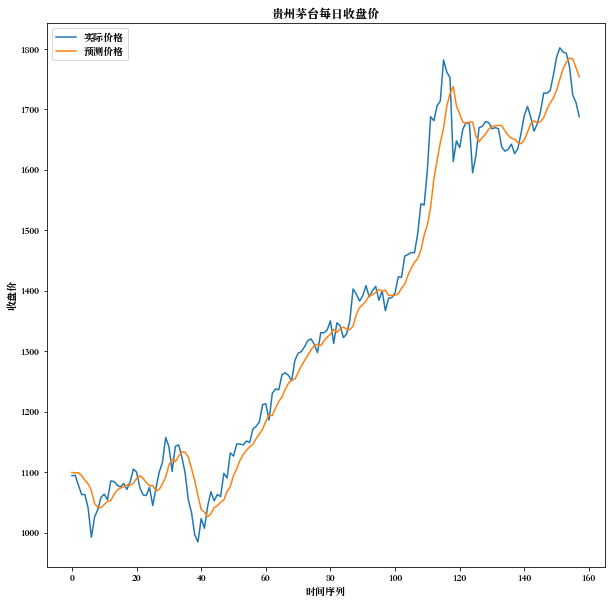

In [24]:
# 数据可视化
fig3 = plt.figure(figsize=(10,10))
plt.plot(y_test, label="实际价格")
plt.plot(y_test_predict, label="预测价格")
plt.title("贵州茅台每日收盘价")
plt.xlabel("时间序列")
plt.ylabel("收盘价")
plt.legend()
plt.show()

In [30]:
# 数据存储
y_test_r = y_test.reshape(-1,1)
print(y_test_r.shape)
print(y_test_predict.shape)

(158, 1)
(158, 1)


In [31]:
final_result = np.concatenate((y_test_r,y_test_predict), axis=1)

In [33]:
final_result_df = pd.DataFrame(final_result, columns=["y_test", "y_test_predict"])
final_result_df.to_csv("predict_test.csv")